# Types of Regression

## TOC:
* [Moore-Penrose pseudo inverse](#first)
* [Least-square regression](#second)
* [Ridge-regression and Kernel-regression](#third)

## Moore-Penrose pseudo inverse <a class="anchor" id="first"></a>

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

Write a function computing the Moore-Penrose pseudo inverse, exploiting the full SVD.

In [9]:
def my_MPpi(A):
    U, s, VT = np.linalg.svd(A)
    s[s > 0] = 1 / s[s > 0]
    A_plus = VT.transpose() @ la.diagsvd(s, A.shape[1], A.shape[0]) @ U.transpose() 
    return A_plus

Write now a function computing the Moore-Penrose pseudo inverse, exploiting the reduced SVD.

In [10]:
def my_MPpi_rSVD(A):
    U, s, VT = np.linalg.svd(A, full_matrices = False)
    s[s > 0] = 1 / s[s > 0]
    A_plus = VT.transpose() @ np.diag(s) @ U.transpose() 
    return A_plus

Generate a random matrix $A$ (with elements sampled from a standard Gaussian distribution) with 5 rows and 4 columns. Compute its Moore-Penrose pseudo inverse thorugh the two functions above defined, and compare the result with the function `numpy.linalg.pinv` 

In [11]:
A = np.random.randn(5,4)
Apinv0 = np.linalg.pinv(A)
Apinv1 = my_MPpi(A)
Apinv2 = my_MPpi_rSVD(A)
print(np.linalg.norm(Apinv0 - Apinv1) / np.linalg.norm(Apinv0))
print(np.linalg.norm(Apinv0 - Apinv2) / np.linalg.norm(Apinv0))

1.3560038984791292e-16
1.3560038984791292e-16


In [12]:
%timeit np.linalg.pinv(A)

84.9 µs ± 8.66 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [13]:
%timeit my_MPpi(A)

70.7 µs ± 4.09 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [14]:
%timeit my_MPpi_rSVD(A)

43 µs ± 3.02 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


## Least-square regression <a class="anchor" id="second"></a>

Consider the linear model
$$
y = mx + q.
$$
where $m = 2$ and $q = 3$.

Generate $N = 100$ points $x_i$, sampling from a standard Gaussian distribution, and the associated $y_i$. Then, add a synthetic noise ($\epsilon_i$) by sampling from a Gaussian distribution with zero mean and standard deviation $\sigma = 2$. Plot the noisy data $(x_i, \tilde{y}_i)$, where $\tilde{y}_i = y_i + \epsilon_i$, in the $(x,y)$ plane, together with the line $y = mx + q$.

In [15]:
m = 2
q = 3
N = 100
noise = 2.0

X = np.random.randn(N)
Y = m*X + q + noise*np.random.randn(N)

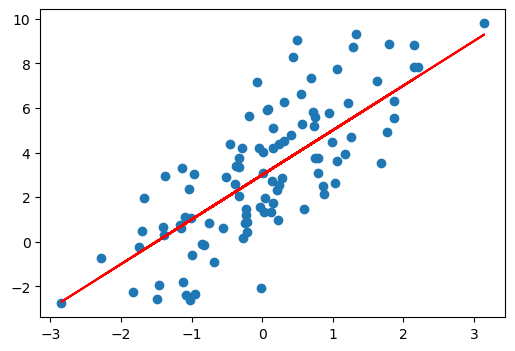

In [16]:
plt.figure(figsize=(6,4))
plt.scatter(X,Y)
plt.plot(X, m*X + q, color = 'red')

### Least-squares Problem 
A least squares problem is a type of mathematical optimization problem where the goal is to minimize the sum of the squares of the differences between observed and predicted values.

The least squares method is used when one wants to find the best-fitting curve or function that can represent a set of data points. It is especially useful when dealing with noisy or inconsistent data and in situations where an exact solution may not be possible. By minimizing the sum of the squares of the residuals (the differences between observed and predicted values), the least squares method provides a way to find the best approximation for the relationship between variables.

Using the previously implemented functions to compute the Moore-Penrose pseudo inverse, solve the least-squares problem
$$
\min_{m,q} \sum_{i=1}^N (\tilde{y}_i - (m x_i + q))^2
$$
and display the regression line superimposed to the noisy data and the exact model.

We have to compute the **DESIGN MATRIX**  $\Phi$ 

The design matrix is a matrix of features used in statistical models, especially in the context of regression analysis. It is constructed based on the input data and is used to represent the relationship between the independent variables (input data) and the dependent variables (target values or responses).

For a simple linear regression problem with one independent variable (univariate regression), the design matrix $\Phi$ is often constructed as:


$\Phi$  = \begin{bmatrix}
x_1 & 1 \\
x_2 & 1 \\
\vdots & \vdots \\
x_N & 1
\end{bmatrix}


Here, $x_i$ represents the input data points, and the column of ones is added to account for the intercept term in the linear regression model. This design matrix enables the representation of the relationship between the input data and the target values in the form of a linear equation: $Y = \Phi \cdot \mathbf{w} + \mathbf{e}$, where $Y$ is the target variable, $\mathbf{w}$ is the vector of coefficients (including the slope and intercept), and $\mathbf{e}$ represents the error term.

In [17]:
# Construct the design matrix Phi
Phi = np.column_stack((X, np.ones(N)))

z = my_MPpi_rSVD(Phi) @ Y #Compute the least Square 
m_hat = z[0]
q_hat = z[1]

print('m_hat = %f' % m_hat)
print('q_hat = %f' % q_hat)

m_hat = 2.179592
q_hat = 3.017272


## Ridge-regression and Kernel-regression <a class="anchor" id="third"></a>

Consider the function
$$
y = f(x) = \tanh(2x - 1).
$$

Generate $N = 100$ points $x_i$, sampling from a standard Gaussian distribution, and the associated $y_i$. Then, add a synthetic noise ($\epsilon_i$) by sampling from a Gaussian distribution with zero mean and standard deviation $\sigma = 0.1$. Plot the noisy data $(x_i, \tilde{y}_i)$, where $\tilde{y}_i = y_i + \epsilon_i$, in the $(x,y)$ plane.

Then, generate 1000 testing points, uniformly distributed in the interval $[-3,3]$, and display the function $y = f(x)$ in correspondence of the testing points.

In [19]:
N = 100
noise = 0.1
y_ex = lambda x: np.tanh(2*(x - 1))

X = np.random.randn(N)
Y = y_ex(X) + noise * np.random.randn(N)

N_test = 1000
X_test = np.linspace(-3,3,N_test)
Y_test = y_ex(X_test)

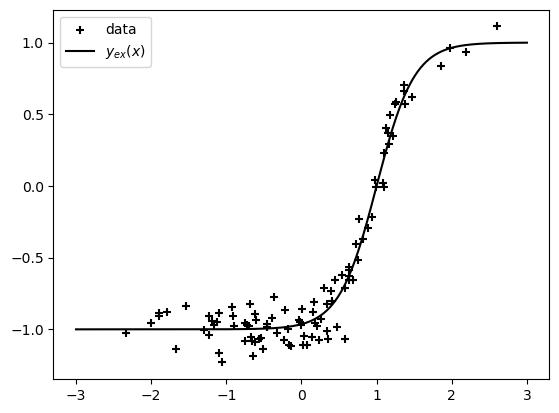

In [20]:
plt.scatter(X,Y, marker = '+', color = 'black', label = 'data')
plt.plot(X_test, Y_test, color = 'black', label = '$y_{ex}(x)$')
plt.legend()

### Least Square regression of data

compute the regression line resulting from the **least squares regression** of data $(x_i, \tilde{y}_i)$. Plot the resulting regression line.

m_hat = 0.482612
q_hat = -0.633856


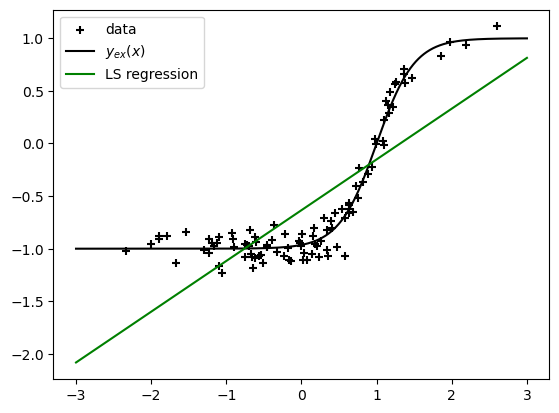

In [21]:
# Construct the design matrix Phi
Phi = np.column_stack((X, np.ones(N)))

z = my_MPpi_rSVD(Phi) @ Y #Compute the least Square 
m_hat = z[0]
q_hat = z[1]

print('m_hat = %f' % m_hat)
print('q_hat = %f' % q_hat)
Y_test_LS = m_hat*X_test + q_hat

plt.scatter(X,Y, marker = '+', color = 'black', label = 'data')
plt.plot(X_test, Y_test, color = 'black', label = '$y_{ex}(x)$')
plt.plot(X_test, Y_test_LS, color = 'green', label = 'LS regression')
plt.legend()

### Ridge Regression of data
Ridge regression is a technique used in multiple regression analysis to handle multicollinearity, a situation where the independent variables are highly correlated. In ridge regression, a penalty term is added to the least squares objective function. This penalty term is a function of the sum of the squares of the coefficients and is scaled by a parameter (often denoted as **α** or **λ**). The primary purpose of ridge regression is to shrink the estimates of the regression coefficients towards zero, thereby reducing their variance and addressing the issue of multicollinearity.

Consider **ridge regression**, corresponding to a regularizaton parameter $\lambda = 1.0$. Compare the obtained regression line with the one obtained through least squares regression.

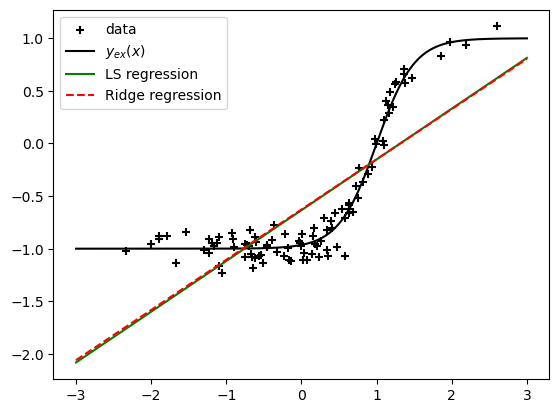

In [22]:
lam = 1.0 #Regularization parameter

PhiPhiT = Phi @ Phi.transpose()
alpha = np.linalg.solve(PhiPhiT + lam*np.eye(N), Y) #Searching ALPHA, solving linear system: (PhiPhiT + lam*I)ALPHA = Y
w = Phi.transpose() @ alpha                         #Coefficients of ridge regression model
Phi_test = np.block([X_test[:,None], np.ones((N_test,1))]) #The design matrix for the test data, Phi_test, is constructed by appending a column of ones to the input test data.
Y_test_RR = Phi_test @ w #Calculate predicted outputs

plt.scatter(X,Y, marker = '+', color = 'black', label = 'data')
plt.plot(X_test, Y_test, color = 'black', label = '$y_{ex}(x)$')
plt.plot(X_test, Y_test_LS, color = 'green', label = 'LS regression')
plt.plot(X_test, Y_test_RR, color = 'red', linestyle = '--', label = 'Ridge regression')
plt.legend()

### Kernel Regression
Kernel regression is a non-parametric technique used for estimating the conditional expectation of a random variable. It is particularly useful when the relationship between variables is not linear and when there is no assumption of a specific parametric model. Kernel regression involves using a kernel function to weigh the contributions of nearby data points to the prediction at a given point. 

Consider now **kernel regression**. 

1. Consider first the scalar product kernel 
$$K(x_i,x_j) = x_i x_j + 1.$$
Compute the regression function and compare the result with the ones obtained at the previous point. How do the results compare?

2. Consider then the higher-order scalar product kernel, for $q > 1$.
$$K(x_i,x_j) = (x_i x_j + 1)^q.$$

3. Consider finally a Gaussian kernel, for $\sigma > 0$.
$$K(x_i,x_j) = \exp\left(-\frac{(x_i - x_j)^2}{2 \sigma^2}\right).$$

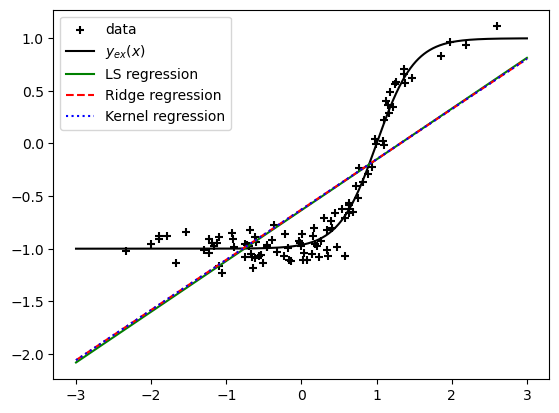

In [23]:
lam = 1.0
sigma = 1.0 #sigma represents the bandwidth parameter for the Gaussian kernel. 
            #It controls the width of the kernel and influences the smoothness of the estimated function.

def kernel(xi,xj): #Defining Gaussian Kernel Function
  return np.exp(-np.abs(xi-xj)**2/(2*sigma**2))

#Calculate Kernel Matrix for training data. Each entry (i, j) is the result of Kernel function applied to X[i] and X[j]
K = np.array([[kernel(X[i],X[j]) for j in range(N)] for i in range(N)])

#Computing alpha solving the linear system (K + lam*I)ALPHA = Y
alpha = np.linalg.solve(K+lam*np.eye(N), Y)

#Kernel function is applied to each data point in the test set X_test and all data points in the training set X.
K_test = np.array([[kernel(X_test[i],X[j]) for j in range(N)] for i in range(N_test)])
Y_test_KR = K_test @ alpha

plt.scatter(X,Y, marker = '+', color = 'black', label = 'data')
plt.plot(X_test, Y_test, color = 'black', label = '$y_{ex}(x)$')
plt.plot(X_test, Y_test_LS, color = 'green', label = 'LS regression')
plt.plot(X_test, Y_test_RR, color = 'red', linestyle = '--', label = 'Ridge regression')
plt.plot(X_test, Y_test_RR, color = 'blue', linestyle = ':', label = 'Kernel regression')
plt.legend()